# 1. Information about the submission

## 1.1 Name and number of the assignment

**Assignment 1:** Word Sense Induction

## 1.2 Student name

**Oguzhan Aksoy**

## 1.3 Codalab user ID

**oguzhan_aksoy**

## 1.4 Additional comments

***Enter here** any additional comments which you would like to communicate to a TA who is going to grade this work not related to the content of your submission.*

# 2. Technical Report

*Use Section 2 to describe results of your experiments as you would do writing a paper about your results. DO NOT insert code in this part. Only insert plots and tables summarizing results as needed. Use formulas if needed do described your methodology. The code is provided in Section 3.*

## 2.1 Methodology

Here is the roster of models employed in addressing the task:

* **Word Embeddings**: Utilized pre-trained fastText and BERT embeddings.
* **Clustering**: Employed Spectral Clustering.
* **Forecasting Cluster Numbers**: Utilized Linear Regression.

To begin, to discern word meanings in varied contexts, I needed to generate contextualized embeddings for words. However, fastText only generates embeddings for individual words. As a basic strategy, I opted to represent contextualized embeddings as the average of fastText embeddings for all words in a given context.

A pivotal component of my approach involves the application of Spectral Clustering. As per our lectures, cosine distance is preferable for measuring vector similarity. Hence, I employed this concept to implement high-quality clustering. Spectral clustering, applied to graph clustering, associates the number of clusters in a graph (connected components) with the eigenvectors corresponding to the zero eigenvalue of the Laplacian matrix of the graph. I utilized an 8-nearest neighbor graph for clustering, as it outperformed other k-NNG and weighted complete graphs on both training and practice sets.

Determining the cluster count posed another challenge. For the wiki-wiki dataset, I employed partitioning into two clusters, as each word in the training set had only two clusters. To estimate the cluster count in the active-dict dataset, I constructed a simple linear regression of the cluster count on the second eigenvalue of the Laplacian matrix.

Regrettably, there was no such linear dependency in the bts-rnc dataset, so I resorted to using a fixed number of clusters.

Thus, the aforementioned constitutes my initial baseline model. In the subsequent phase, I introduced a weighted sum of fastText embeddings, using tf-idf factors as weights instead of simple averaging. This feature marginally enhanced scores across all three datasets.

The subsequent modification involved leveraging BERT instead of fastText for embedding generation. The first approach involved the direct generation of context embeddings by BERT. While clustering of BERT embeddings showed improvement, it wasn't as substantial as anticipated. Additionally, I experimented with using concatenated embeddings of BERT and fastText.

The most potent model I developed employed a different technique for embedding generation. Instead of using embeddings for the entire context, I extracted only those corresponding to the target word and then averaged them. Challenges arose when the target word in the same form as in the 'word' column was absent, prompting the implementation of code to search for the closest word in the context and use its embedding.

In essence, my optimal model operates as follows:

1. Extract contextualized embeddings of the target word using BERT (average of target word embeddings).
2. Calculate the distance matrix for contextualized embeddings using cosine distance.
3. (specifically for the active-dict dataset) Compute the Laplacian matrix and its eigenvalues, employing linear regression to estimate the number of different senses.
4. Apply Spectral Clustering to the distance matrix.

## 2.2 Discussion of results

This table doesn't encompass all the models I explored. For instance, I experimented with various clustering parameters for the fastText model, but only the optimal configurations are showcased here. Moreover, due to time constraints, I couldn't replicate results for all datasets using concatenated embeddings of fastText and BERT.

Method | Train: wiki-wiki | Practice: bts-rnc | Practice: active-dict | Test: wiki-wiki | Test: bts-rnc | Test: active-dict
--- | --- | --- | --- | --- | --- | ---
fastText \| Linear regression \| Spectral clustering (baseline) | 0.781 | 0.223 | 0.160 | 0.651 | 0.265 |	0.155
fastText + tfidf \| Linear regression \| Spectral clustering| 0.808 | 0.234 | 0.197 | 0.652 | 0.272 | 0.182
BERT(whole context) \| Linear regression \| Spectral clustering  | 0.972 | 0.372 | 0.243 | 0.902 | 0.291 | 	0.221
BERT(target) \| Linear regression \| Spectral clustering  | 0.963 | 0.663 | 0.368 | 0.921 | 0.496 | 0.338


# 3. Code

*Enter here all code used to produce your results submitted to Codalab. Add some comments and subsections to navigate though your solution.*

*In this part you are expected to develop yourself a solution of the task and provide a reproducible code:*
- *Using Python 3;*
- *Contains code for installation of all dependencies;*
- *Contains code for downloading of all the datasets used*;
- *Contains the code for reproducing your results (in other words, if a tester downloads your notebook she should be able to run cell-by-cell the code and obtain your experimental results as described in the methodology section)*.


*As a result, you code will be graded according to these criteria:*
- ***Readability**: your code should be well-structured preferably with indicated parts of your approach (Preprocessing, Model training, Evaluation, etc.).*
- ***Reproducibility**: your code should be reproduced without any mistakes with “Run all” mode (obtaining experimental part).*


## 3.1 Requirements

In [ ]:
pip install transformers

In [ ]:
pip install deeppavlov

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.2/489.2 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.4/222.4 kB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 58.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.4/57.4 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.3/64.3 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.1 MB/s eta 0:00:00
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.66.1
    Uninstalling tqdm-4.66.1:
      Successfully uninstalled tqdm-4.66.1
  Attempting uninstall: scipy
    Found existing installation: scipy 1.11.3
    Uninstalling scipy-1.11.3:
      Successfully 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

from sklearn.linear_model import LinearRegression
from sklearn.cluster import AffinityPropagation, SpectralClustering, AgglomerativeClustering, KMeans, DBSCAN
from sklearn.metrics import adjusted_rand_score
from scipy.sparse.csgraph import laplacian
from scipy.spatial import distance_matrix
from sklearn.metrics.pairwise import cosine_distances, cosine_similarity
from scipy.sparse.linalg import eigsh
import gensim

from sklearn.feature_extraction.text import TfidfVectorizer

from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import nltk

import torch
from transformers import AutoTokenizer, AutoModel
from difflib import get_close_matches

## 3.2 Download the data

In [ ]:
!git clone https://github.com/nlpub/russe-wsi-kit.git

Cloning into 'russe-wsi-kit'...
remote: Enumerating objects: 154, done.
remote: Counting objects: 100% (38/38), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 154 (delta 7), reused 28 (delta 6), pack-reused 116
Receiving objects: 100% (154/154), 3.83 MiB | 5.30 MiB/s, done.
Resolving deltas: 100% (62/62), done.


In [ ]:
cd russe-wsi-kit

/content/russe-wsi-kit


In [ ]:
!wget http://vectors.nlpl.eu/repository/20/214.zip

--2023-11-30 14:11:54--  http://vectors.nlpl.eu/repository/20/214.zip
Resolving vectors.nlpl.eu (vectors.nlpl.eu)... 129.240.189.181
Connecting to vectors.nlpl.eu (vectors.nlpl.eu)|129.240.189.181|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1920218982 (1.8G) [application/zip]
Saving to: ‘214.zip’

214.zip             100%[===================>]   1.79G  24.5MB/s    in 75s     

2023-11-30 14:13:10 (24.5 MB/s) - ‘214.zip’ saved [1920218982/1920218982]



In [ ]:
!unzip 214.zip -d ru_fasttext_model

Archive:  214.zip
  inflating: ru_fasttext_model/meta.json  
  inflating: ru_fasttext_model/model.model  
  inflating: ru_fasttext_model/model.model.vectors_ngrams.npy  
  inflating: ru_fasttext_model/model.model.vectors.npy  
  inflating: ru_fasttext_model/model.model.vectors_vocab.npy  
  inflating: ru_fasttext_model/README  


In [ ]:
ru_fasttext_model = gensim.models.KeyedVectors.load('ru_fasttext_model/model.model')

## 3.3 Preprocessing and key functions

In [ ]:
df_wiki_train = pd.read_csv('data/main/wiki-wiki/train.csv', sep='\t')
df_active_train = pd.read_csv('data/main/active-dict/train.csv', sep='\t')
df_bts_train = pd.read_csv('data/main/bts-rnc/train.csv', sep='\t')

df_wiki_test = pd.read_csv('data/main/wiki-wiki/test.csv', sep='\t')
df_active_test = pd.read_csv('data/main/active-dict/test.csv', sep='\t')
df_bts_test = pd.read_csv('data/main/bts-rnc/test.csv', sep='\t')

In [ ]:
# tokenizer and stop words

nltk.download('stopwords')

tokenizer = RegexpTokenizer(r'[а-я]+')
stop_words = set(stopwords.words('russian'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# tfidf fitting
tfidf_vectorizer = TfidfVectorizer(tokenizer=lambda x: tokenizer.tokenize(x))

corpus = list(df_wiki_train['context'])  + \
         list(df_active_train['context']) + \
         list(df_bts_train['context']) + \
         list(df_wiki_test['context'])  + \
         list(df_active_test['context']) + \
         list(df_bts_test['context'])

tfidf_vectorizer.fit(corpus)
idf_dict = dict(zip(tfidf_vectorizer.get_feature_names_out(), tfidf_vectorizer.idf_))

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
def preprocess(document):
  document = document.lower() # Convert to lowercase
  words = tokenizer.tokenize(document) # Tokenize
  words = [w for w in words if not w in stop_words] # Removing stopwords
  return words

def get_context_embedding_w2v(context, target, use_tfidf=False):
  """Calculates context embedding as average of the words embeddings"""
  words = preprocess(context)
  emb = np.zeros(300)
  weights_sum = 0
  sent = ' '.join(words)
  for word in set(words):
    if (word in ru_fasttext_model.key_to_index) and (word is not target):
      weight = sent.count(word)
      if use_tfidf and word in idf_dict:
        weight *= idf_dict[word]
      emb += ru_fasttext_model[word] * weight
      weights_sum += weight

  if weights_sum != 0:
      return emb / weights_sum
  return emb

def embeddings_generator(dataset, get_emb_func, get_emb_func2=None, **kwargs):
  """
  Generates context embeddings for each target word in a dataset and corresponding index mask.
  Can concatenate embeddings of two different models, if two embedding functions are provided.
  """

  for word in dataset['word'].unique():
    mask = (dataset['word'] == word)
    embs = []
    for context in dataset[mask]['context']:
      emb = get_emb_func(context, word, **kwargs)
      if get_emb_func2 is not None:
        emb2 = get_emb_func2(context, word)
        emb = np.concatenate([emb, emb2])
      embs.append(emb)

    yield np.array(embs), mask

def prepare_data(dataset, get_emb_func, **kwargs):
  """
  For each target word in a dataset calculates:
  a) first five eigenvalues of a Laplacian of the corresponding graph,
      based on cosine distance;
  b) number of different senses

  This data is used to fit linear regression to predict number of clusters
  """
  eig = []
  num_senses = []
  for embeddings, mask in embeddings_generator(dataset, get_emb_func, **kwargs):
    A = cosine_distances(embeddings, embeddings)
    L = laplacian(A)
    eig_values, eig_vectors = np.linalg.eigh(L)
    eig.append(eig_values[0:5])
    num_senses.append(dataset[mask]['gold_sense_id'].nunique())

  return np.array(eig), np.array(num_senses)

def clusterise(data, predict_clusters=False):
  A = cosine_distances(data, data)
  n_clus_pred = 2
  if predict_clusters:
    L = laplacian(A)
    eig_values, eig_vectors = np.linalg.eigh(L)
    n_clus_pred = int(np.around(linreg.predict(eig_values[1].reshape(1, -1))))
  clst = SpectralClustering(max(2, n_clus_pred), affinity='precomputed_nearest_neighbors', n_neighbors=min(8, A.shape[0]))
  return clst.fit_predict(A)

## 3.4 fastText based model

In [ ]:
# Linear regression for clustering
X, y = prepare_data(df_active_train, get_context_embedding_w2v, use_tfidf=True)

linreg = LinearRegression()
linreg.fit(X[:, [1]], y)
linreg.score(X[:, [1]], y)

0.9202637785199619

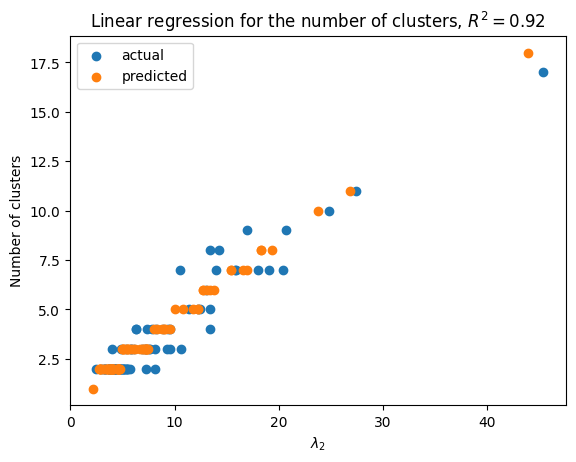

In [ ]:
plt.scatter(X[:, 3], y, label='actual')
plt.scatter(X[:, 1], np.round(linreg.predict(X[:, [1]])), label='predicted')
plt.xlabel('$\lambda_{2}$')
plt.ylabel('Number of clusters')
plt.title('Linear regression for the number of clusters, $R^2=0.92$')
plt.legend()


In [ ]:
dataset = df_active_test # put here any dataset you wish

for embedings, mask in embeddings_generator(dataset, get_context_embedding_w2v, use_tfidf=False):
  y_pred = clusterise(embedings, predict_clusters=True) # should be True for df_active_train or df_active_test
  dataset.loc[mask, 'predict_sense_id'] = y_pred

In [ ]:
dataset.to_csv('pred.csv', sep='\t')

In [ ]:
! head pred.csv

In [ ]:
from evaluate import evaluate
print(evaluate("pred.csv"))

## 3.5 BERT based model

In [ ]:
tokenizer_pretrained = AutoTokenizer.from_pretrained("sberbank-ai/sbert_large_nlu_ru")
model_pretrained = AutoModel.from_pretrained("sberbank-ai/sbert_large_nlu_ru")

tokenizer_config.json:   0%|          | 0.00/323 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/655 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/1.78M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.71G [00:00<?, ?B/s]

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model_pretrained.to(device)

def mean_pooling(model_output, attention_mask):
    token_embeddings = model_output[0] #First element of model_output contains all token embeddings
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    sum_embeddings = torch.sum(token_embeddings * input_mask_expanded, 1)
    sum_mask = torch.clamp(input_mask_expanded.sum(1), min=1e-9)
    return sum_embeddings / sum_mask

def get_context_embedding_bert(context, target):
    """
    Returns embedding of the whole context
    """
    encoded_input = tokenizer_pretrained(context, padding=True, truncation=True, return_tensors='pt')
    with torch.no_grad():
        model_output = model_pretrained(**{k: v.to(device) for k, v in encoded_input.items()})

    return mean_pooling(model_output, encoded_input['attention_mask'].to(device))[0].cpu().numpy()

def get_context_embedding_bert_2(context, target):
    """
    Returns contextualized embedding of the target word.
    Sorry for the mess and low readability of this part, but it works and I had no
    time to rewrite it :(
    """
    encoded_input = tokenizer_pretrained(context, padding=True, truncation=True, return_tensors='pt')
    with torch.no_grad():
        model_output = model_pretrained(**{k: v.to(device) for k, v in encoded_input.items()})
    target_id = tokenizer_pretrained(target)['input_ids'][1]
    input_ids = np.array(encoded_input['input_ids'].squeeze())
    ids = np.argwhere(input_ids == target_id)
    if len(ids) == 0:
         close_match = get_close_matches(target, tokenizer.tokenize(context.lower()))
         if len(close_match) == 0:
            return model_output[0].squeeze().cpu().numpy().mean(axis=0).squeeze()
         target_id = tokenizer_pretrained(close_match[0])['input_ids'][1]
         ids = np.argwhere(input_ids == target_id)
    embeddings = model_output[0].squeeze().cpu().numpy()[ids]
    if len(ids) > 1:
        return embeddings.mean(axis=0).squeeze()
    return embeddings.squeeze()

In [ ]:
# new linear regression for new embeddings
X, y = prepare_data(df_active_train, get_context_embedding_bert)

linreg = LinearRegression()
linreg.fit(X[:, [1]], y)
linreg.score(X[:, [1]], y)

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


0.8726033517437897

In [ ]:
dataset = df_wiki_train # any dataset

# or get_context_embedding_bert_2, or two functions can be passed (bert and fasstext, for example)
for embeddings, mask in embeddings_generator(dataset, get_context_embedding_bert):
    y_pred = clusterise(embeddings, predict_clusters=False)
    dataset.loc[mask, 'predict_sense_id'] = y_pred


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


In [ ]:
dataset.to_csv('pred.csv', sep='\t')
print(evaluate('pred.csv'))

word	ari	count
бор	1.000000	56
замок	0.969774	138
лук	0.927919	110
суда	1.000000	135
	0.972437	439
None
